In [65]:
import matplotlib.pyplot as plt
import numpy as np
WHEELBASE = 2.36                        # Wheelbase in meters
FRONT_WIDTH = 1.35  
LANE_WIDTH = 4 
LENGTH_CURVE = np.pi * 20
LENGTH_STRAIGHT = 50

CAR_CORNERS = np.array([(WHEELBASE, -FRONT_WIDTH/2),
                        (WHEELBASE, FRONT_WIDTH/2),
                        (0, FRONT_WIDTH/2),
                        (0, -FRONT_WIDTH/2)])

y_curve = np.linspace(0,LENGTH_CURVE, 2000) 
y_trajectory = np.concatenate((np.linspace(0,LENGTH_STRAIGHT,LENGTH_STRAIGHT*10), y_curve + LENGTH_STRAIGHT, np.linspace(LENGTH_CURVE+LENGTH_STRAIGHT, LENGTH_CURVE+2*LENGTH_STRAIGHT, LENGTH_STRAIGHT*10)))
x_left_trajectory = np.concatenate((np.zeros(LENGTH_STRAIGHT*10), 3 * np.sin(y_curve/10), np.zeros(LENGTH_STRAIGHT*10)))
x_right_trajectory = x_left_trajectory + LANE_WIDTH

def create_corners_plot(car_position, theta):
    corners = corners_car(car_position, theta)
    chassis_car = np.append(corners, [corners[0]], axis=0)
    plt.plot(chassis_car[:,0],chassis_car[:,1], color='blue', alpha=0.5)
        
def rotation(point, theta):
    return np.array([[np.cos(theta), -np.sin(theta)], [np.sin(theta), np.cos(theta)]]) @ point

def corners_car(car_position, theta):
        corners = []
        num_corners = 4
        for i in range(num_corners):
            x, y = rotation(CAR_CORNERS[i], theta) + car_position
            corners.append([x,y])
        return np.array(corners)
def get_direction(theta):
    dx = 3 * np.cos(theta)
    dy = 3 * np.sin(theta)
    return dx, dy

In [66]:
def plot_graphic(position, theta):
    position_plot = np.array(position)
    create_corners_plot(position_plot, theta)
    
    dx, dy = get_direction(theta)
    plt.arrow(position[0], position[1], dx, dy, head_width=0.2, head_length=0.5, fc='k', ec='k') 

In [67]:
def find_closest_point_car(y_trajectory, corner):
    start_idx_right = np.searchsorted(y_trajectory, corner, side="left") - 1
    #Ensure that the idxs are within the trajectory array
    idx_min = max(0,start_idx_right) 
    idx_max = min(len(y_trajectory),start_idx_right+2)
    # Find the closest point to the car between the two values
    closest_point = np.abs(y_trajectory[idx_min:idx_max] - corner)
    return idx_min + np.argmin(closest_point)
        
a = find_closest_point_car(y_trajectory, 63.95098909)


In [68]:
File_type = ["straight", "curves", "two_curves"]
VERSION = 20
TYPE = 2
data = np.load(f"Task5_results\left_the_road_{File_type[TYPE]}{VERSION}.pkl", allow_pickle=True)
# 0 -num_seconds_sim
# 1 - car_position [0],
# 2 - car_position[1]
# 3 - self.theta
# 4 - self.velocity, 
# 5 - "Right"/ "Left"
i = 0
j = 0
for num,values in data:
    if len(values) == 0:
        continue 
    i+=1
    values = np.array(values)
    print(f"{len(values)} values -> Velocities {float(values[0,4])}")
    j += len(values)
print(f"Total number of values: {i}, {j}")

2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
2 values -> Velocities 29.0
2 values -> Velocities 31.0
Total number of values: 32, 64


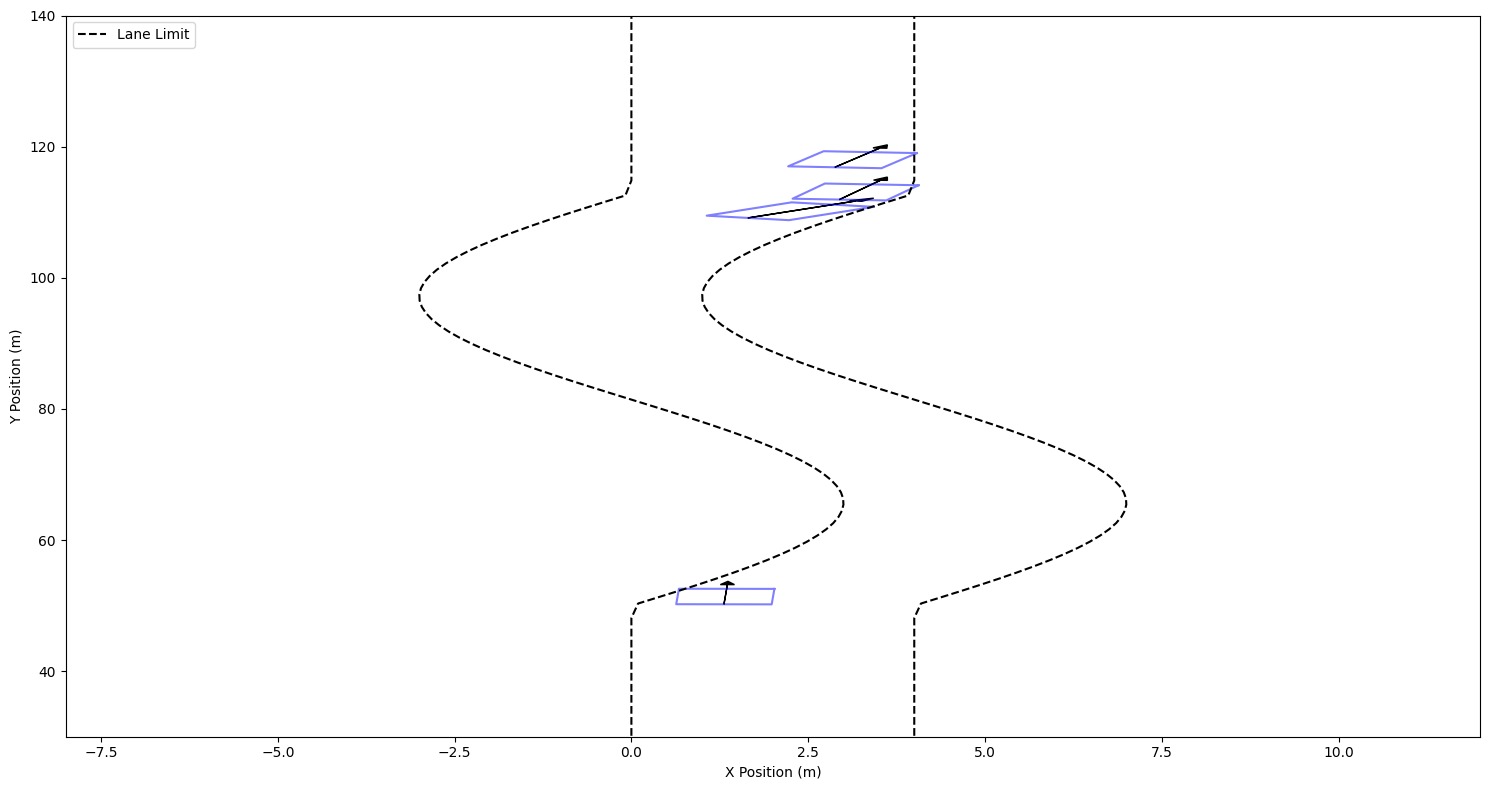

In [29]:
plt.figure(figsize=(15, 8))
plt.xlabel('X Position (m)')
plt.ylabel('Y Position (m)')

already_plotted = set()
for num,values in data:
    if len(values) == 0:
        continue 
    for value in values:
        if tuple(value[1:4]) in already_plotted:
            continue
        plot_graphic(value[1:3], value[3])
        already_plotted.add(tuple(value[1:4]))
        
plt.plot(x_left_trajectory[0:-1:30], y_trajectory[0:-1:30], 'k--', label='Lane Limit')
plt.plot(x_right_trajectory[0:-1:30], y_trajectory[0:-1:30], 'k--')
plt.xlim(LANE_WIDTH/2 - 10, LANE_WIDTH/2 + 10)
plt.ylim(30, 140)
plt.tight_layout()      
plt.legend(loc='upper left')

# Map1

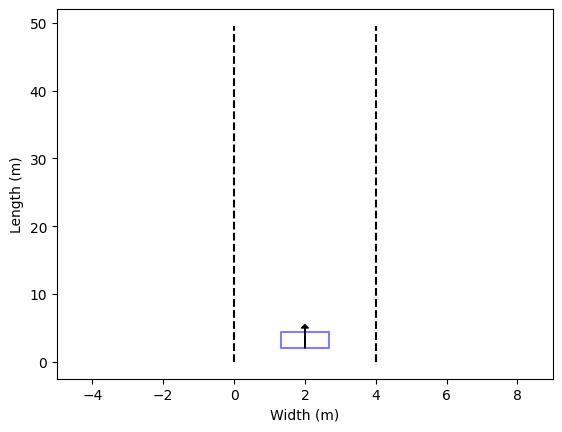

In [60]:
LENGTH_STRAIGHT = 50
y_trajectory = np.linspace(0,LENGTH_STRAIGHT, 1000)
x_left_trajectory = np.zeros(1000)
x_right_trajectory = x_left_trajectory + LANE_WIDTH
plt.figure()
plt.plot(x_left_trajectory[0:-1:30], y_trajectory[0:-1:30], 'k--', label='Lane Limit')
plt.plot(x_right_trajectory[0:-1:30], y_trajectory[0:-1:30], 'k--')
plt.xlim(LANE_WIDTH/2 - 7, LANE_WIDTH/2 + 7)
plt.xlabel('Width (m)')
plt.ylabel('Length (m)')
plot_graphic((2, 2), np.pi/2)
# plt.ylim(30, 140)

# Map2

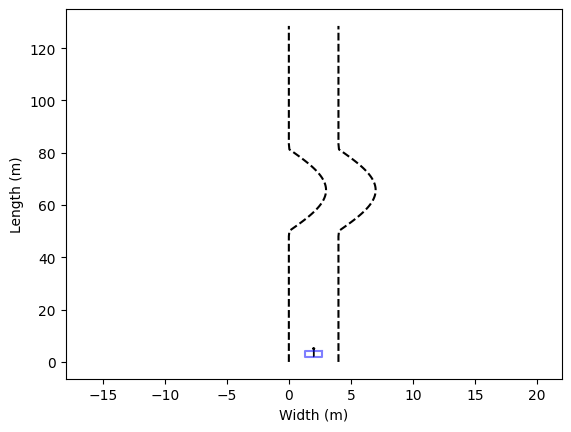

In [73]:
LENGTH_CURVE = np.pi * 10
LENGTH_STRAIGHT = 50
y_curve = np.linspace(0,LENGTH_CURVE, 2000)
y_trajectory = np.concatenate((np.linspace(0,LENGTH_STRAIGHT,LENGTH_STRAIGHT*10), y_curve + LENGTH_STRAIGHT, np.linspace(LENGTH_CURVE+LENGTH_STRAIGHT, LENGTH_CURVE+2*LENGTH_STRAIGHT, LENGTH_STRAIGHT*10)))
x_left_trajectory = np.concatenate((np.zeros(LENGTH_STRAIGHT*10), 3 * np.sin(y_curve/10), np.zeros(LENGTH_STRAIGHT*10)))
x_right_trajectory = x_left_trajectory + LANE_WIDTH
plt.figure()
plt.plot(x_left_trajectory[0:-1:30], y_trajectory[0:-1:30], 'k--', label='Lane Limit')
plt.plot(x_right_trajectory[0:-1:30], y_trajectory[0:-1:30], 'k--')
plt.xlim(-20 + 2, 20 + 2)
plt.xlabel('Width (m)')
plt.ylabel('Length (m)')
plot_graphic((2, 2), np.pi/2)

# MAP3

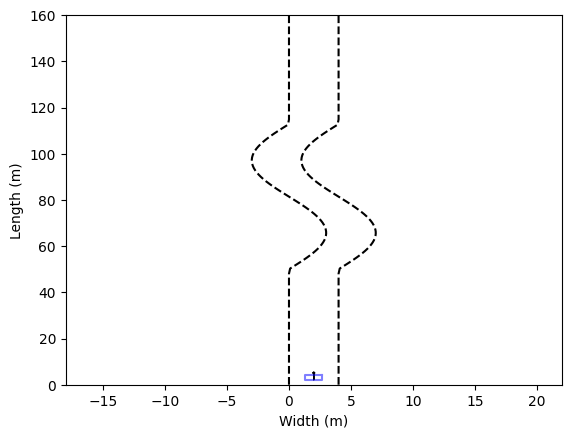

In [ ]:

LENGTH_CURVE = np.pi * 20
LENGTH_STRAIGHT = 50
y_curve = np.linspace(0,LENGTH_CURVE, 2000) 
y_trajectory = np.concatenate((np.linspace(0,LENGTH_STRAIGHT,LENGTH_STRAIGHT*10), y_curve + LENGTH_STRAIGHT, np.linspace(LENGTH_CURVE+LENGTH_STRAIGHT, LENGTH_CURVE+2*LENGTH_STRAIGHT, LENGTH_STRAIGHT*10)))
x_left_trajectory = np.concatenate((np.zeros(LENGTH_STRAIGHT*10), 3 * np.sin(y_curve/10), np.zeros(LENGTH_STRAIGHT*10)))
x_right_trajectory = x_left_trajectory + LANE_WIDTH
plt.figure()
plt.plot(x_left_trajectory[0:-1:30], y_trajectory[0:-1:30], 'k--', label='Lane Limit')
plt.plot(x_right_trajectory[0:-1:30], y_trajectory[0:-1:30], 'k--')

plt.xlim(-20 + 2, 20 + 2)
plt.ylim(0, 160)
plt.xlabel('Width (m)')
plt.ylabel('Length (m)')
plot_graphic((2, 2), np.pi/2)
